# City of Toronto Budget Analysis - Trends
---


In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting up paths for source files
budget_2019_lg_path = "Resources/approved-operating-budget-summary-2019.xlsx"
budget_2020_lg_path = "Resources/approved-operating-budget-summary-2020.xlsx"
budget_2021_lg_path = "Resources/approved-operating-budget-summary-2021.xlsx"
budget_2022_lg_path = "Resources/approved-operating-budget-summary-2022.xlsx"
budget_2023_lg_path = "Resources/approved-operating-budget-summary-2023.xlsx"

budget_2019_lg = pd.read_excel(budget_2019_lg_path, sheet_name='2019')
budget_2020_lg = pd.read_excel(budget_2020_lg_path, sheet_name='open data')
budget_2021_lg = pd.read_excel(budget_2021_lg_path, sheet_name='2021')
budget_2022_lg = pd.read_excel(budget_2022_lg_path, sheet_name='Open Data')
budget_2023_lg = pd.read_excel(budget_2023_lg_path, sheet_name='Open Data')

In [3]:
budgets_list = [budget_2019_lg, budget_2020_lg, budget_2021_lg, budget_2022_lg, budget_2023_lg]
len(budgets_list)

5

In [4]:
#Verification of Categories
for df_lg in budgets_list:
    print(df_lg["Category Name"].value_counts())

Category Name
Service And Rent                            7445
Salaries And Benefits                       3663
Materials & Supplies                        3198
Inter-Divisional Charges                    1899
Equipment                                    936
Inter-Divisional Recoveries                  686
Contribution To Reserves/Reserve Funds       361
Sundry and Other Revenues                    346
User Fees & Donations                        239
Other Expenditures                           227
Transfers From Capital                       145
Contribution From Reserves/Reserve Funds     124
Provincial Subsidies                          70
Licences & Permits Revenue                    52
Federal Subsidies                             26
Contribution To Capital                        7
Other Subsidies                                4
Name: count, dtype: int64
Category Name
Service And Rent                            7447
Salaries And Benefits                       3405
Materials & Sup

In [5]:
#clean 2021 budget category "0"
budget_2021_lg = budget_2021_lg.loc[budget_2021_lg["Category Name"] != 0, :]
budget_2021_lg["Category Name"].value_counts()

Category Name
Service And Rent                            6989
Materials & Supplies                        3009
Benefits                                    2484
Other Expenditures                          1119
Equipment                                    941
Salaries                                     940
Other Revenue                                620
Contribution To Reserves/Reserve Funds       344
User Fees & Donations                        318
Contribution From Reserves/Reserve Funds     124
Transfers From Capital                       120
Provincial Subsidies                          83
Federal Subsidies                             30
Contribution To Capital                        6
Name: count, dtype: int64

In [6]:
budget_2019_lg["Rev-2019"] = budget_2019_lg[2019.0][budget_2019_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2019_lg["Exp-2019"] = budget_2019_lg[2019.0][budget_2019_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2020_lg["Rev-2020"] = budget_2020_lg[2020.0][budget_2020_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2020_lg["Exp-2020"] = budget_2020_lg[2020.0][budget_2020_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2021_lg["Rev-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2021_lg["Exp-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2022_lg["Rev-2022"] = budget_2022_lg[2022.0][budget_2022_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2022_lg["Exp-2022"] = budget_2022_lg[2022.0][budget_2022_lg["Expense/Revenue"] == "Expenses"].abs()
budget_2023_lg["Rev-2023"] = budget_2023_lg[2023.0][budget_2023_lg["Expense/Revenue"] == "Revenues"].abs()
budget_2023_lg["Exp-2023"] = budget_2023_lg[2023.0][budget_2023_lg["Expense/Revenue"] == "Expenses"].abs()

C:\Users\lukas\AppData\Local\Temp\ipykernel_12152\914039083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_2021_lg["Rev-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Revenues"].abs()
C:\Users\lukas\AppData\Local\Temp\ipykernel_12152\914039083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_2021_lg["Exp-2021"] = budget_2021_lg[2021.0][budget_2021_lg["Expense/Revenue"] == "Expenses"].abs()


In [7]:
budget_2019_lg.sample(10)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,2019,Rev-2019,Exp-2019
10224,"Facilities, Real Estate, Environment & Energy",Real Estate,Lease Management,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Health,-772644.00,772644.0,NaN
16024,Solid Waste Management Services,City Beautification,Litter Pick-up,Expenses,Service And Rent,Insurance,Ins Claims-General,1146.38,NaN,1146.38
18618,Toronto Water,Stormwater Management,Stormwater Treatment,Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-Flt Flat Maint,66061.14,NaN,66061.14
7620,"Policy, Planning, Finance & Administration",Program Support,Complement Management & Reporting,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Water Ser,-135229.20,135229.2,NaN
10670,Information & Technology,Business IT Solutions,Solution Implementation,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,29136279.61,NaN,29136279.61
9113,Transportation Services,Road & Sidewalk Management,Winter Operations,Expenses,Service And Rent,Contracted Services,Contr Srv #Monit Sys,2000.01,NaN,2000.01
14059,City Clerk's Office,Open Government,Corporate Information Production Services,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Child Serv,-241300.00,241300.0,NaN
10247,"Facilities, Real Estate, Environment & Energy",Real Estate,Property Acquisition,Expenses,Salaries And Benefits,Casual Salaries,Casual - Reg Pay Sap,5715.54,NaN,5715.54
11769,Office of the Controller,ASD-Financial Reporting & Control,ASD-Financial Statement Preparation,Expenses,Salaries And Benefits,Benefits,Comprehensive Med,56833.32,NaN,56833.32
10859,Information & Technology,Computer & Communications Technology Infrastru...,Network & Telecommunications,Expenses,Salaries And Benefits,Gapping,Gapping,-325010.79,NaN,325010.79


# Trends - Revenue per Category

In [8]:
#Create DataFrames with summed values by Category
rev_category_2019_lg = pd.DataFrame(budget_2019_lg.groupby("Category Name")["Rev-2019"].sum().round(2))
rev_category_2020_lg = pd.DataFrame(budget_2020_lg.groupby("Category Name")["Rev-2020"].sum().round(2))
rev_category_2021_lg = pd.DataFrame(budget_2021_lg.groupby("Category Name")["Rev-2021"].sum().round(2))
rev_category_2022_lg = pd.DataFrame(budget_2022_lg.groupby("Category Name")["Rev-2022"].sum().round(2))
rev_category_2023_lg = pd.DataFrame(budget_2023_lg.groupby("Category Name")["Rev-2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
rev_category_timeline_lg = pd.merge(rev_category_2019_lg, rev_category_2020_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2021_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2022_lg, on="Category Name", how="outer")
rev_category_timeline_lg = pd.merge(rev_category_timeline_lg, rev_category_2023_lg, on="Category Name", how="outer")

#Clean on null values
rev_category_timeline_lg = rev_category_timeline_lg.fillna(0.00)
rev_category_timeline_lg = pd.DataFrame(rev_category_timeline_lg.loc[(rev_category_timeline_lg["Rev-2019"] > 0.00)|(rev_category_timeline_lg["Rev-2020"] > 0.00)|(rev_category_timeline_lg["Rev-2021"] > 0.00)|(rev_category_timeline_lg["Rev-2022"] > 0.00)|(rev_category_timeline_lg["Rev-2023"] > 0.00),:])

rev_category_timeline_lg

,Rev-2019,Rev-2020,Rev-2021,Rev-2022,Rev-2023
Category Name,,,,,
Contribution From Reserves/Reserve Funds,5.416717e+08,5.230802e+08,5.267769e+08,6.126027e+08,7.260764e+08
Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155041e+08
Inter-Divisional Recoveries,3.161485e+08,1.572818e+08,0.000000e+00,3.124781e+08,3.197343e+08
Licences & Permits Revenue,1.389864e+08,1.416429e+08,0.000000e+00,0.000000e+00,0.000000e+00
Other Subsidies,8.450810e+06,1.813821e+07,0.000000e+00,0.000000e+00,0.000000e+00
Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
Sundry and Other Revenues,7.322785e+09,7.630285e+09,0.000000e+00,0.000000e+00,0.000000e+00
Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09


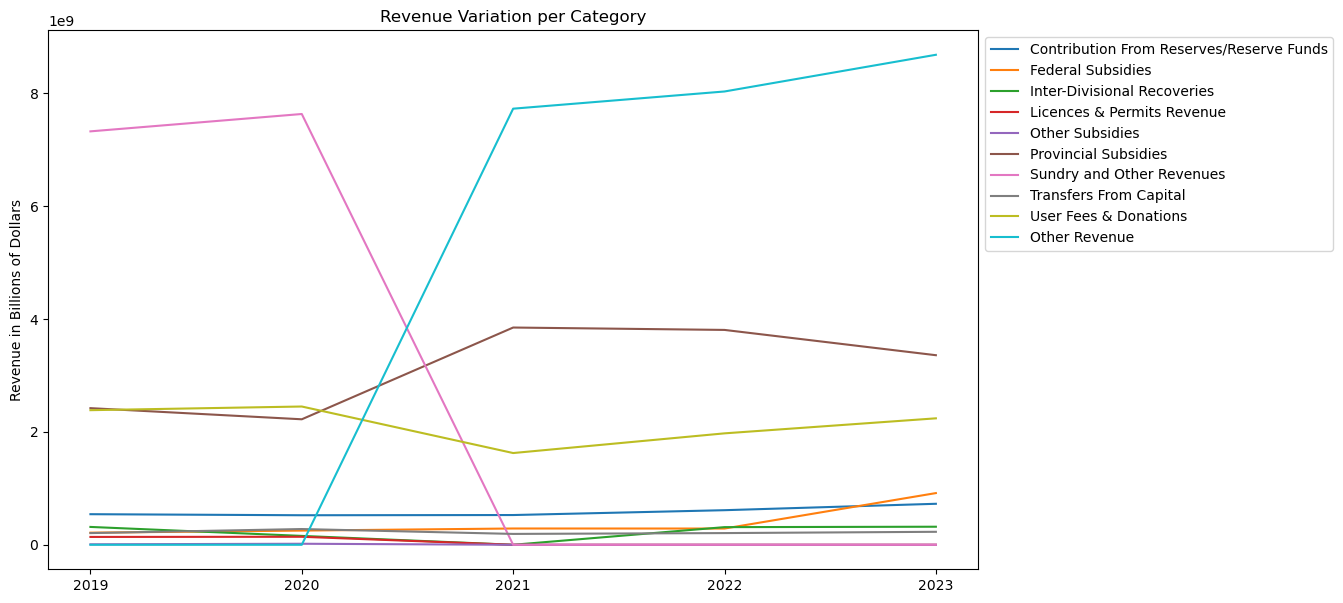

In [9]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = rev_category_timeline_lg.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(rev_category_timeline_lg.iterrows()):
        plt.plot(x_axis, rev_category_timeline_lg.iloc[i], label=index)

plt.ylabel("Revenue in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Revenue Variation per Category")
plt.show()

### Analysis

From the data above it is possible to notice that not all categories suffer considerable variation of Revenue for the city within the past 5 years.

The abrupt decrease on "Sundry and other Revenues" and the increase on "Other Revenue" between the years of 2020 and 2021 are caused by the change of the category name from one period to another.

A more precise analysis follows.

In [10]:
rev_category_timeline_lg_2 = rev_category_timeline_lg.drop(index=["Sundry and Other Revenues", "Other Revenue"])
rev_category_timeline_lg_2

,Rev-2019,Rev-2020,Rev-2021,Rev-2022,Rev-2023
Category Name,,,,,
Contribution From Reserves/Reserve Funds,5.416717e+08,5.230802e+08,5.267769e+08,6.126027e+08,7.260764e+08
Federal Subsidies,2.143136e+08,2.513977e+08,2.883508e+08,2.875820e+08,9.155041e+08
Inter-Divisional Recoveries,3.161485e+08,1.572818e+08,0.000000e+00,3.124781e+08,3.197343e+08
Licences & Permits Revenue,1.389864e+08,1.416429e+08,0.000000e+00,0.000000e+00,0.000000e+00
Other Subsidies,8.450810e+06,1.813821e+07,0.000000e+00,0.000000e+00,0.000000e+00
Provincial Subsidies,2.420082e+09,2.222765e+09,3.847996e+09,3.805709e+09,3.357879e+09
Transfers From Capital,2.069584e+08,2.788116e+08,1.923544e+08,2.071879e+08,2.297670e+08
User Fees & Donations,2.384165e+09,2.449051e+09,1.624933e+09,1.973689e+09,2.239722e+09


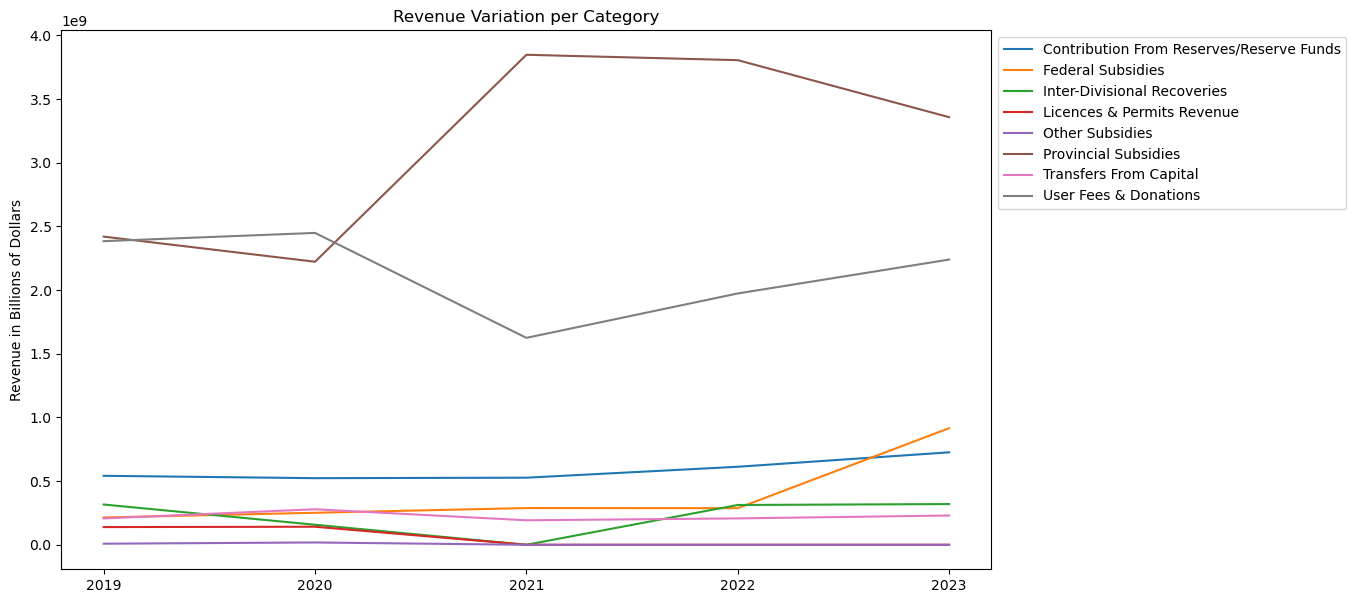

In [11]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = rev_category_timeline_lg_2.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(rev_category_timeline_lg_2.iterrows()):
        plt.plot(x_axis, rev_category_timeline_lg_2.iloc[i], label=index)

plt.ylabel("Revenue in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Revenue Variation per Category")
plt.show()

### Analysis

By removing the "Other Revenue" category (initially called "Sundry and Other Revenues"), the only category that overpasses the range of 5 Billion Dollars, it is possible to analyse the other sources of revenue with more precision.

Provincial Subsidies, the second greater contributor of the city's revenue, suffered a considerable increase from 2020 to 2021, dropping slightly afterwards. Opposite behavior to User fees and donations.

Within the group with lower impact on the overall revenue, Federal Subsidies can be highlighted by its increase from 280 Million Dollars to 915 million. 

# Trends - Expenses per Category

In [12]:
#Create DataFrames with summed values by Category
exp_category_2019_lg = pd.DataFrame(budget_2019_lg.groupby("Category Name")["Exp-2019"].sum().round(2))
exp_category_2020_lg = pd.DataFrame(budget_2020_lg.groupby("Category Name")["Exp-2020"].sum().round(2))
exp_category_2021_lg = pd.DataFrame(budget_2021_lg.groupby("Category Name")["Exp-2021"].sum().round(2))
exp_category_2022_lg = pd.DataFrame(budget_2022_lg.groupby("Category Name")["Exp-2022"].sum().round(2))
exp_category_2023_lg = pd.DataFrame(budget_2023_lg.groupby("Category Name")["Exp-2023"].sum().round(2))

#Create Main DataFrame with revenue by category for all 5 years
exp_category_timeline_lg = pd.merge(exp_category_2019_lg, exp_category_2020_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2021_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2022_lg, on="Category Name", how="outer")
exp_category_timeline_lg = pd.merge(exp_category_timeline_lg, exp_category_2023_lg, on="Category Name", how="outer")

#Clean on null values
exp_category_timeline_lg = exp_category_timeline_lg.fillna(0.00)
exp_category_timeline_lg = pd.DataFrame(exp_category_timeline_lg.loc[(exp_category_timeline_lg["Exp-2019"] > 0.00)|(exp_category_timeline_lg["Exp-2020"] > 0.00)|(exp_category_timeline_lg["Exp-2021"] > 0.00)|(exp_category_timeline_lg["Exp-2022"] > 0.00)|(exp_category_timeline_lg["Exp-2023"] > 0.00),:])

exp_category_timeline_lg

,Exp-2019,Exp-2020,Exp-2021,Exp-2022,Exp-2023
Category Name,,,,,
Contribution To Capital,3.434535e+08,3.434555e+08,3.495350e+08,3.477590e+08,3.454875e+08
Contribution To Reserves/Reserve Funds,1.374326e+09,1.492208e+09,1.569495e+09,6.790572e+08,8.177363e+08
Equipment,6.256912e+07,6.305564e+07,6.305676e+07,6.962870e+07,7.491960e+07
Inter-Divisional Charges,3.161485e+08,1.569948e+08,0.000000e+00,3.124781e+08,3.197343e+08
Materials & Supplies,7.350229e+08,7.344638e+08,8.132793e+08,8.103749e+08,8.393636e+08
Other Expenditures,2.778683e+09,2.699534e+09,2.923059e+09,2.864243e+09,3.151181e+09
Salaries And Benefits,6.319399e+09,6.092481e+09,0.000000e+00,0.000000e+00,0.000000e+00
Service And Rent,2.082853e+09,2.178262e+09,2.342040e+09,2.632925e+09,3.071138e+09
Benefits,0.000000e+00,0.000000e+00,1.450706e+09,1.488014e+09,1.586110e+09


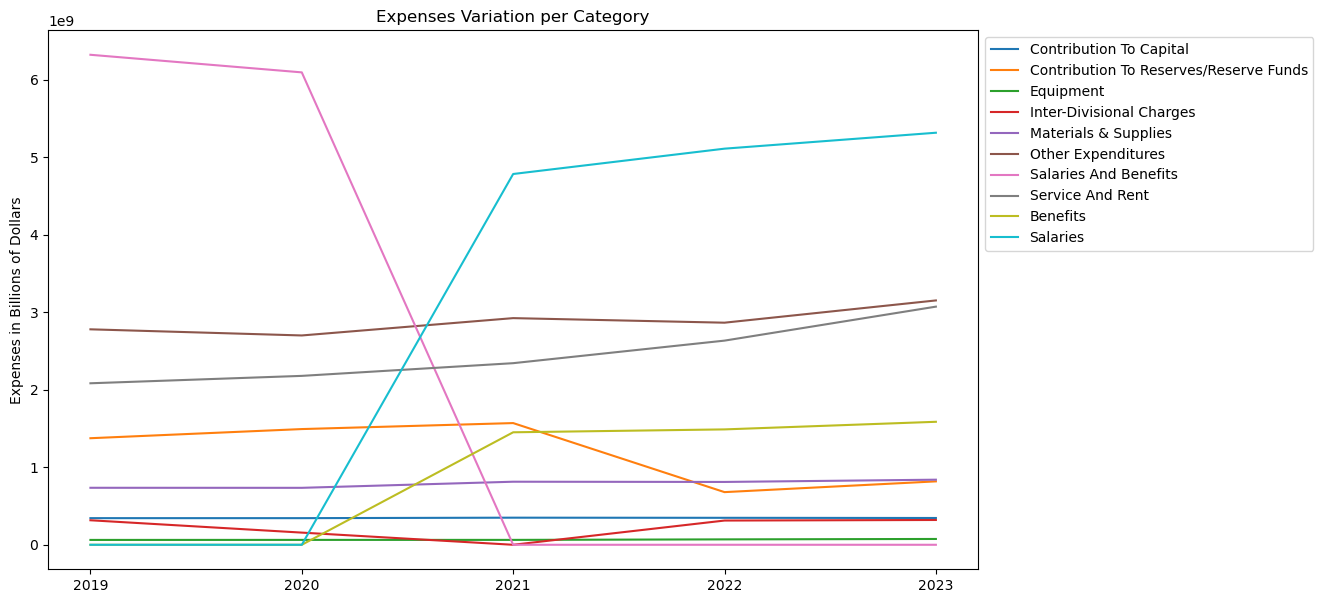

In [13]:
x_axis = ["2019", "2020", "2021", "2022", "2023" ]
y_axis_1 = exp_category_timeline_lg.iloc[1]

fig, ax = plt.subplots(figsize=(12, 7))

for i, (index, row) in enumerate(exp_category_timeline_lg.iterrows()):
        plt.plot(x_axis, exp_category_timeline_lg.iloc[i], label=index)

plt.ylabel("Expenses in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Expenses Variation per Category")
plt.show()

### Analysis

In terms of expenses, the categories tend to be more dynamic. "Salaries and Benefits" suffered a slight decrease from 2019 and 2020, returning to gradual growth between 2020 and 2023 (In 2020 this category was split into Salaries and Benefits separately).
The Categories "Other Expenditures" and "Service and Rent" two categories contributing between 2 and 3 billions per year approximately, show a positive curve in the last period, "Service and Rent" being the most accentuated one.

"Contribution to Reseverves/Reserve Funds" suffered an apparent decrease between 2021 and 2022, same period where "Inter-Divisional Charges" increased after a two year low, coming back to the range of 300 millions observed in 2019.

Equipement expenses stands stable thoughout the 5 year period.

# Trends - Profit and Loss by Program

#### Categories classify the ins and outs of the different programs developed by the City of Toronto. The following analysis takes a further step into identifying the contribution of the main programs by their profit and loss.

In [40]:
#Create new DataFrame for each year by Program, sorting by the total Result for the five year timeframe
pandl_2019_lg = pd.DataFrame(budget_2019_lg.groupby("Program")[2019].sum()*-1)
pandl_2020_lg = pd.DataFrame(budget_2020_lg.groupby("Program")[2020].sum()*-1)
pandl_2021_lg = pd.DataFrame(budget_2021_lg.groupby("Program")[2021].sum()*-1)
pandl_2022_lg = pd.DataFrame(budget_2022_lg.groupby("Program")[2022].sum()*-1)
pandl_2023_lg = pd.DataFrame(budget_2023_lg.groupby("Program")[2023].sum()*-1)

pandl_timeline_lg = pd.merge(pandl_2019_lg, pandl_2020_lg, on="Program", how="outer")
pandl_timeline_lg = pd.merge(pandl_timeline_lg, pandl_2021_lg, on="Program", how="outer")
pandl_timeline_lg = pd.merge(pandl_timeline_lg, pandl_2022_lg, on="Program", how="outer")
pandl_timeline_lg = pd.merge(pandl_timeline_lg, pandl_2023_lg, on="Program", how="outer")
pandl_timeline_lg["Acc 5 Years"] = pandl_timeline_lg.sum(axis=1)
pandl_timeline_lg = pandl_timeline_lg.sort_values("Acc 5 Years", ascending=False)
del pandl_timeline_lg["Acc 5 Years"]

In [42]:
pandl_timeline_lg.head(7)

,2019,2020,2021,2022,2023
Program,,,,,
Non-Program Taxation Tax Levy,4.312970e+09,4.424468e+09,4.489183e+09,4.645212e+09,4.908091e+09
Non-Program Revenues,1.425733e+09,1.487400e+09,2.769604e+09,2.723871e+09,2.411922e+09
Toronto Water,-9.999931e-03,-3.096648e-08,-5.960464e-08,9.757928e+08,9.993700e+08
Court Services,6.436089e+06,4.001411e+07,4.400115e+07,3.632768e+07,5.523187e+07
Toronto Building,1.589421e+07,1.614689e+07,1.614689e+07,1.614689e+07,1.614689e+07
Toronto Parking Authority,-0.000000e+00,1.200000e-01,1.862645e-09,1.440144e+07,2.544384e+07
Solid Waste Management Services,5.200000e-01,-1.200000e-01,-1.300000e-01,1.315746e+07,1.200400e+07


In [43]:
pandl_timeline_lg.tail(7)

,2019,2020,2021,2022,2023
Program,,,,,
"Parks, Forestry & Recreation",-3.250350e+08,-3.230675e+08,-3.443521e+08,-3.441745e+08,-3.396806e+08
Non-Program Expenditures,-4.461500e+08,-3.536494e+08,-3.677475e+08,-5.987614e+08,-4.523897e+08
Fire Services,-4.757832e+08,-4.766023e+08,-4.886179e+08,-5.026978e+08,-5.030049e+08
"Shelter, Support & Housing Administration",-4.629617e+08,-5.067888e+08,-7.772719e+08,-4.546127e+08,-4.917394e+08
Capital & Corporate Financing,-9.321672e+08,-9.557735e+08,-1.008401e+09,-8.613916e+08,-9.202026e+08
Toronto Transit Commission - Conventional,-6.219578e+08,-6.425818e+08,-1.471938e+09,-1.285315e+09,-1.189272e+09
Toronto Police Service,-1.026771e+09,-1.076195e+09,-1.080093e+09,-1.118219e+09,-1.166526e+09


In [44]:
# Create the DataFrames for More Profitable Programs
panl_mgain_lg = pandl_timeline_lg.iloc[0:7,0:5]
#Dropping incomplete Programs:
panl_mgain_lg = panl_mgain_lg.drop(["Toronto Water", "Toronto Parking Authority","Solid Waste Management Services"])
panl_mgain_lg

,2019,2020,2021,2022,2023
Program,,,,,
Non-Program Taxation Tax Levy,4.312970e+09,4.424468e+09,4.489183e+09,4.645212e+09,4.908091e+09
Non-Program Revenues,1.425733e+09,1.487400e+09,2.769604e+09,2.723871e+09,2.411922e+09
Court Services,6.436089e+06,4.001411e+07,4.400115e+07,3.632768e+07,5.523187e+07
Toronto Building,1.589421e+07,1.614689e+07,1.614689e+07,1.614689e+07,1.614689e+07


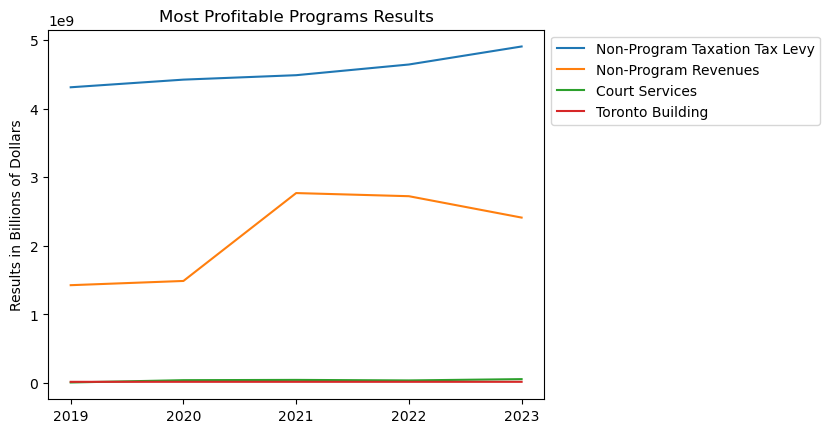

In [56]:
for i, (index, row) in enumerate(panl_mgain_lg.iterrows()):
        plt.plot(x_axis, panl_mgain_lg.iloc[i], label=index)

plt.ylabel("Results in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Most Profitable Programs Results")
plt.show()

In [55]:
# Understanding Non-Program Revenues
non_program_rev_lg = budget_2023_lg.loc[budget_2023_lg["Program"] == "Non-Program Revenues",:]
non_program_rev_lg = pd.DataFrame(non_program_rev_lg.groupby("Commitment item")["Rev-2023"].sum().sort_values(ascending=False))
non_program_rev_lg.head(10)

,Rev-2023
Commitment item,
Municipal Land Transfer Tax,9.440205e+08
Provincial Grants & Subsidies,9.327768e+08
Investment Income,2.461943e+08
Payments In Lieu Of Taxes,9.623799e+07
Contributions From Reserve Funds,9.247840e+07
Fines,7.569600e+07
Hotel and Lodging Tax,6.933700e+07
Tax Levy,6.573368e+07
Sundry Revenue,4.142391e+07


### Analysis - Most Profitable Programs

The Non-Program Taxation Tax Levy results show a constant increase from 2019 to 2023. The Non-Program Revenues (Municipal Land Transfer Tax, Provincial Grants & Subsidies, Investment Income, Fines, Hotel and Lodging Tax and others) show, on the other hand, a certain decrease in profitablity from 2021 to 2023.

Court Services (program with a slight increase on results from 2022 to 2023) and Toronto Building stand stable with a lower participation in the city's results.


In [59]:
# Create the DataFrames for less profitable Programs
panl_mloss_lg = pandl_timeline_lg.iloc[-7:,0:5]
panl_mloss_lg

,2019,2020,2021,2022,2023
Program,,,,,
"Parks, Forestry & Recreation",-3.250350e+08,-3.230675e+08,-3.443521e+08,-3.441745e+08,-3.396806e+08
Non-Program Expenditures,-4.461500e+08,-3.536494e+08,-3.677475e+08,-5.987614e+08,-4.523897e+08
Fire Services,-4.757832e+08,-4.766023e+08,-4.886179e+08,-5.026978e+08,-5.030049e+08
"Shelter, Support & Housing Administration",-4.629617e+08,-5.067888e+08,-7.772719e+08,-4.546127e+08,-4.917394e+08
Capital & Corporate Financing,-9.321672e+08,-9.557735e+08,-1.008401e+09,-8.613916e+08,-9.202026e+08
Toronto Transit Commission - Conventional,-6.219578e+08,-6.425818e+08,-1.471938e+09,-1.285315e+09,-1.189272e+09
Toronto Police Service,-1.026771e+09,-1.076195e+09,-1.080093e+09,-1.118219e+09,-1.166526e+09


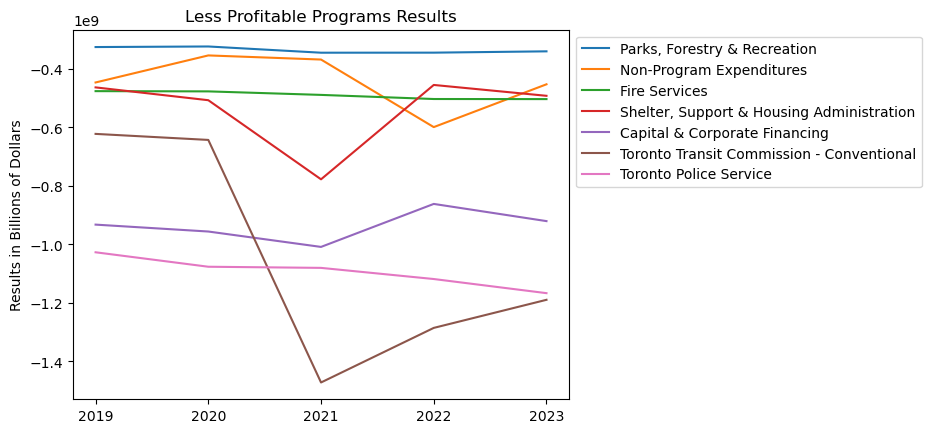

In [61]:
for i, (index, row) in enumerate(panl_mloss_lg.iterrows()):
        plt.plot(x_axis, panl_mloss_lg.iloc[i], label=index)

plt.ylabel("Results in Billions of Dollars")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Less Profitable Programs Results")
plt.show()

### Analysis - Less Profitable Programs

The programs that present the lower profitability for the city also show a higher variation in their results for along the past 5 years.

Toronto Transit Commission, for example decreased its results from 2020 ti 2021 to a point where i became the less profitable program overall, being close to Toronto Police services with amolst 1.2 billion dollars cost over profit in 2023.

From a far point of view, all seven programs show a decreasing behavior since 2019.